In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from datetime import datetime,date

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Opening datasets needed for analysis

rat_data = pd.read_csv('clean_csv/final_rat_sightings.csv')
rest_data = pd.read_csv('clean_csv/final_rat_violations.csv')
weather_data = pd.read_csv('clean_csv/final_weather.csv')

In [3]:
weather_data.head()

,Unnamed: 0,Date,Max Temp (F),Mean Temp (F),Min Temp (F),Max Humidity,Mean Humidity,Min Humidity,Max Pressure (In),Mean Pressure (In),Min Pressure (In),Precipitation (In),City,Season
0,0,2010-01-02,33,25.0,17,89,68,46,29.70,29.67,29.62,0.01,New York City (USA),Winter
1,1,2010-01-03,24,21.0,18,62,53,44,29.64,29.55,29.47,0.00,New York City (USA),Winter
2,2,2010-01-04,32,26.0,20,62,53,43,29.76,29.71,29.66,0.00,New York City (USA),Winter
3,3,2010-01-05,32,27.0,21,62,53,43,29.76,29.73,29.68,0.00,New York City (USA),Winter
4,4,2010-01-06,36,31.0,26,63,52,40,29.80,29.73,29.68,0.00,New York City (USA),Winter


In [4]:

rat_data = rat_data.rename(columns = {'Sighting Date':'Date'})
rat_data.head()

,Unnamed: 0,Incident ID,Date,Complaint Type,Incident,Location Type,Incident Zip,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,0,31464015,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006,Manhattan,980656.0,197137.0,40.707772,-74.012963
1,1,31464024,2015-09-04,Rodent,Rat Sighting,Commercial Building,10306,Staten Island,955207.0,148858.0,40.575209,-74.104547
2,2,31464025,2015-09-04,Rodent,Rat Sighting,1-2 Family Dwelling,10310,Staten Island,949033.0,169278.0,40.631236,-74.126878
3,3,31464026,2015-09-04,Rodent,Rat Sighting,3+ Family Apt. Building,11206,Brooklyn,1000550.0,197585.0,40.708987,-73.941207
4,4,31464027,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462,Bronx,1021648.0,250489.0,40.854130,-73.864813


In [5]:
weather_rat = pd.merge(rat_data, weather_data, how="inner", on="Date")


In [6]:
weather_rat["Year"] = pd.DatetimeIndex(weather_rat["Date"]).year
weather_rat.head()

,Unnamed: 0_x,Incident ID,Date,Complaint Type,Incident,Location Type,Incident Zip,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),...,Max Humidity,Mean Humidity,Min Humidity,Max Pressure (In),Mean Pressure (In),Min Pressure (In),Precipitation (In),City,Season,Year
0,0,31464015,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006,Manhattan,980656.0,197137.0,...,82,70,58,30.22,30.07,29.91,0.0,New York City (USA),Summer,2015
1,1,31464024,2015-09-04,Rodent,Rat Sighting,Commercial Building,10306,Staten Island,955207.0,148858.0,...,82,70,58,30.22,30.07,29.91,0.0,New York City (USA),Summer,2015
2,2,31464025,2015-09-04,Rodent,Rat Sighting,1-2 Family Dwelling,10310,Staten Island,949033.0,169278.0,...,82,70,58,30.22,30.07,29.91,0.0,New York City (USA),Summer,2015
3,3,31464026,2015-09-04,Rodent,Rat Sighting,3+ Family Apt. Building,11206,Brooklyn,1000550.0,197585.0,...,82,70,58,30.22,30.07,29.91,0.0,New York City (USA),Summer,2015
4,4,31464027,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462,Bronx,1021648.0,250489.0,...,82,70,58,30.22,30.07,29.91,0.0,New York City (USA),Summer,2015


In [24]:
year_count = pd.DataFrame({"Count Sightings":weather_rat.groupby(["Year", "Season"])["Incident ID"].count()}).reset_index()
year_count
autumn = year_count.loc[year_count['Season'] == "Autumn"]
spring = year_count.loc[year_count['Season'] == "Spring"]
summer = year_count.loc[year_count['Season'] == "Summer"]
winter = year_count.loc[year_count['Season'] == "Winter"]


,Year,Season,Count Sightings
3,2010,Winter,1512
7,2011,Winter,1674
11,2012,Winter,1870
15,2013,Winter,2052
19,2014,Winter,1828
23,2015,Winter,2227


In [8]:
#weather_rat["Season"].value_counts()
weather_count = pd.DataFrame({"Count Sightings":weather_rat.groupby(["Season"])["Incident ID"].count()}).reset_index()
weather_count

,Season,Count Sightings
0,Autumn,15129
1,Spring,20104
2,Summer,23390
3,Winter,11163


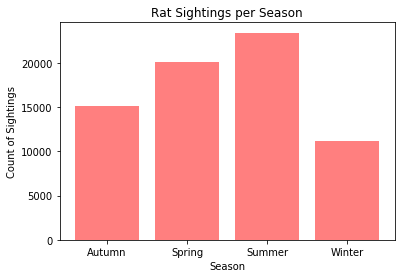

In [32]:
plt.bar(weather_count["Season"], weather_count["Count Sightings"] , color="red", alpha=0.5, align="center")

plt.title("Rat Sightings per Season")
plt.xlabel("Season")
plt.ylabel("Count of Sightings")

plt.savefig("rat_sightings_seasons.png")

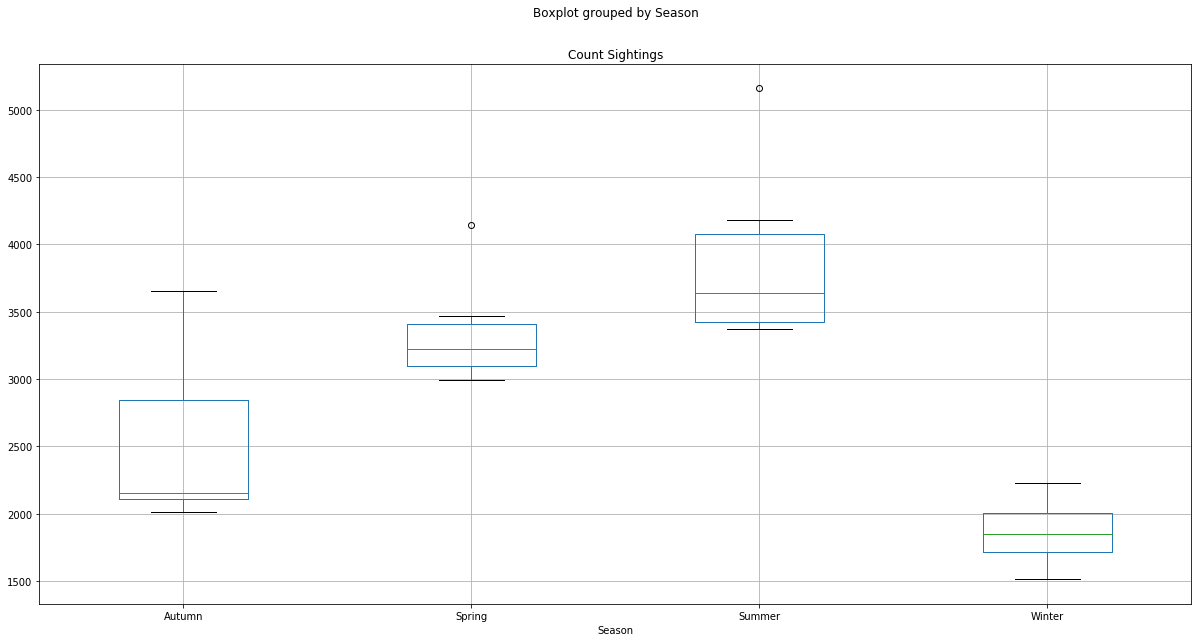

In [10]:
#theories - more people are outside, more food outside,

year_count.boxplot("Count Sightings", by="Season", figsize=(20, 10))


In [11]:
group1 = year_count[year_count["Count Sightings"] == 1]["Season"]
group2 = year_count[year_count["Count Sightings"] == 2]["Season"]
group3 = year_count[year_count["Count Sightings"] == 3]["Season"]
group4 = year_count[year_count["Count Sightings"] == 4]["Season"]


In [12]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=nan, pvalue=nan)

In [27]:
F, p = stats.f_oneway(autumn["Count Sightings"], spring["Count Sightings"], summer["Count Sightings"], winter["Count Sightings"])
F, p

(16.508906404518473, 1.2334395659251597e-05)

In [ ]:
# Season is statistically significant with a p-value of 1.233e-5.

In [53]:
borough_count = pd.DataFrame({"Count Sightings":weather_rat.groupby(["Borough", "Season"])["Incident ID"].count()}).reset_index()
borough_count.head()


,Borough,Season,Count Sightings
0,Bronx,Autumn,3284
1,Bronx,Spring,3880
2,Bronx,Summer,4545
3,Bronx,Winter,2643
4,Brooklyn,Autumn,4892


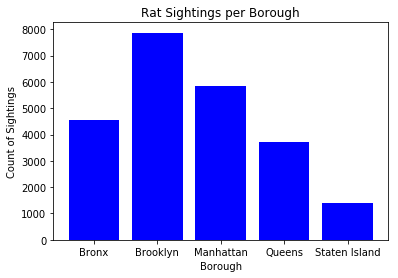

In [74]:
plt.bar(borough_count["Borough"], borough_count["Count Sightings"], color='blue', )
plt.title("Rat Sightings per Borough")
plt.xlabel("Borough")
plt.ylabel("Count of Sightings")

plt.savefig("rat_sightings_borough.png")

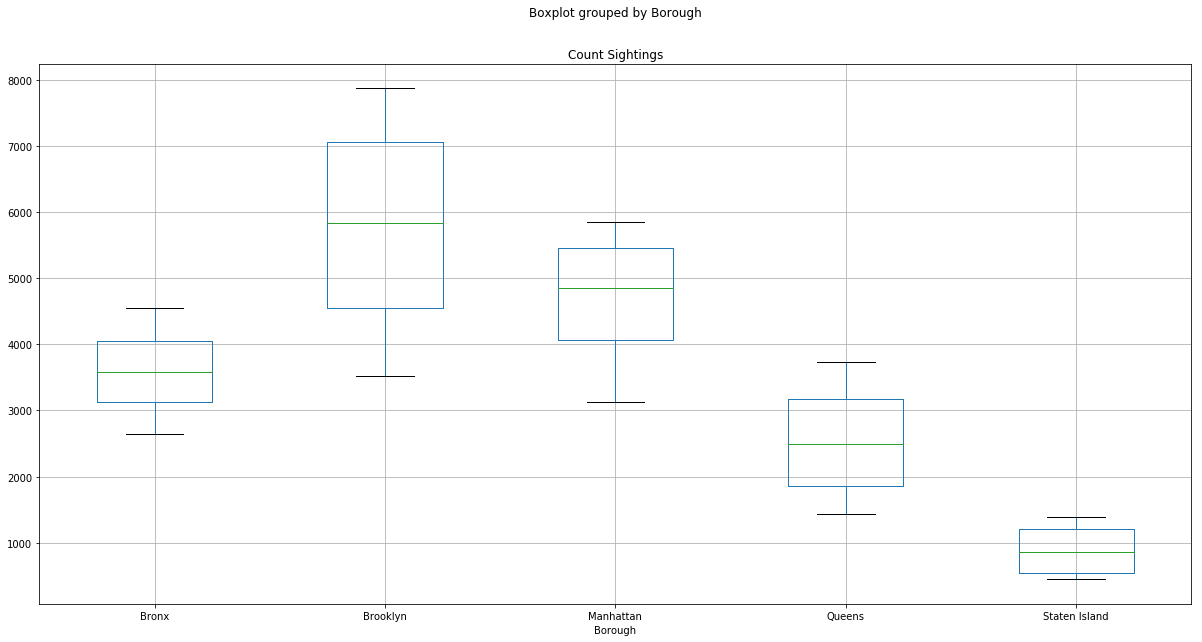

In [62]:

borough_count.boxplot("Count Sightings", by="Borough", figsize=(20, 10))

In [64]:
bronx = borough_count.loc[borough_count['Borough'] == "Brox"]
brooklyn = borough_count.loc[borough_count['Borough'] == "Brooklyn"]
manhattan = borough_count.loc[borough_count['Borough'] == "Manhattan"]
queens = borough_count.loc[borough_count['Borough'] == "Queens"]
staten_island = borough_count.loc[borough_count['Borough'] == "Staten Island"]

In [65]:
F, p = stats.f_oneway(bronx["Count Sightings"], brooklyn["Count Sightings"], manhattan["Count Sightings"], queens["Count Sightings"], staten_island["Count Sightings"])
print(F, p)

nan nan


In [67]:
# borough is not statistically significant

In [71]:
precipitation_count = pd.DataFrame({"Count Sightings":weather_rat.groupby(["Precipitation (In)"])["Incident ID"].count()}).reset_index()
precipitation_count.head()



,Precipitation (In),Count Sightings
0,0.00,48231
1,0.01,2226
2,0.02,1449
3,0.03,1403
4,0.04,912


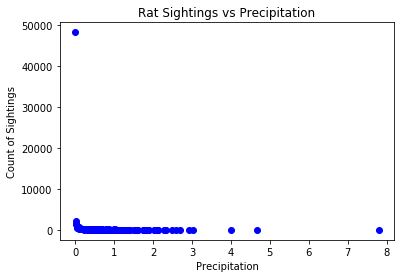

In [73]:
plt.scatter(precipitation_count["Precipitation (In)"], precipitation_count["Count Sightings"], color='blue', )
plt.title("Rat Sightings vs Precipitation")
plt.xlabel("Precipitation")
plt.ylabel("Count of Sightings")

plt.savefig("rat_sightings_precipitation.png")